<a href="https://colab.research.google.com/github/Saddam705/Bike-sharing-Demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Import necessary libraries

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import plot_importance, XGBRegressor

from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading
We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter course/capston project/ml 1/SeoulBikeData.csv',encoding= 'unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

#First Checking the duplicate entries in data
Duplicate entries given wrong pridiction and also consume unnecessory storage and consuming time during testing and training data

In [ ]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


here we not found any duplicate

In [ ]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [ ]:
datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [ ]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


#Finding details from data:

* There are 14 features with 8760 rows of data.

* There are 4 categorical columns and 10 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type

*  Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type

*  Columns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type

* Not any null value present in any column

* Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2



In [ ]:
# Statistical info.
data.describe().T                             #.T use for transpose the describe table

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

#Data Filtering
##Rented Bike days Filtering

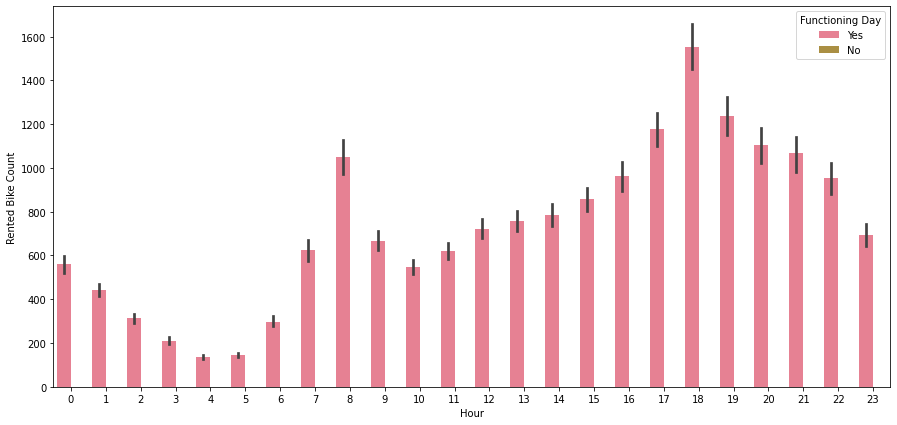

In [ ]:
#for chech functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [ ]:
# Grouping by functioning day and calculating the total Rented Bike Count
data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day,So remove Non Functioning Days and then remove Functioning Day Column Also

In [ ]:
#Removing data of non functional days (non rented days)
df=data.drop(data[data['Functioning Day'] == 'No'].index) 

In [ ]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df1=df.drop(['Functioning Day'], axis = 1)

In [ ]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df1.shape,"\n") 

Filtered Dataframe with only rented bike days : (8465, 13) 



##Seperate Date, Month, Year from Date Column
First, let's convert Date to a datecolumn and extract different parts of the date.

In [ ]:
#convert in datetime64[ns] datatype
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [ ]:
#Seperate Day, Month, Year from DataFrame Column

df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [ ]:
# drop the Date column after extracting necessory information
df1.drop(columns=['Date'],inplace=True)

#Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

We'll use libraries Matplotlib, Seaborn for visualization.

#Checking Correlation Of Data
Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

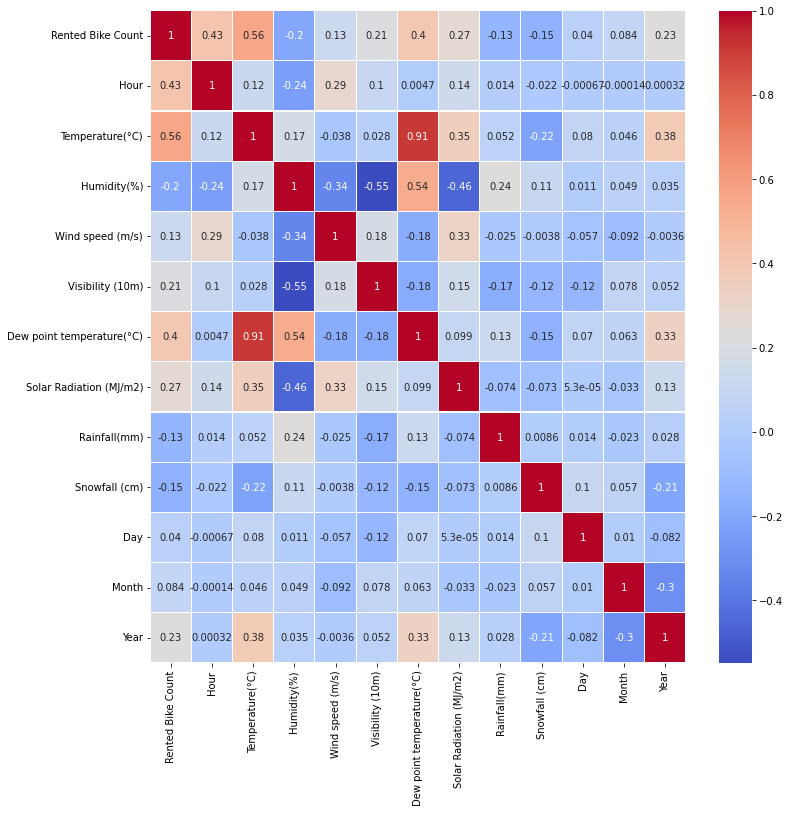

In [ ]:
#find correlation with data
data_corr= df1.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop Dew point temperature feature

In [ ]:
#Drop Dew point temperature(°C) from dataset df1
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)  

Finding Insides:

We can see that with our targer variable (Rented Bike Count), the most correlated variables are : Hour, Temperature, Dew point temperature

###Finding Insides:

We can see that with our targer variable (Rented Bike Count), the most correlated variables are : Hour, Temperature, Dew point temperature

##Numarical Variables

In [ ]:
#if dtype is not Equal to object type then its a num data
numerical_features=[col for col in df1.columns if df1[col].dtype!='O']
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [ ]:
# Seprate dataframe for Numerical feature
num_data=df1[numerical_features]
num_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


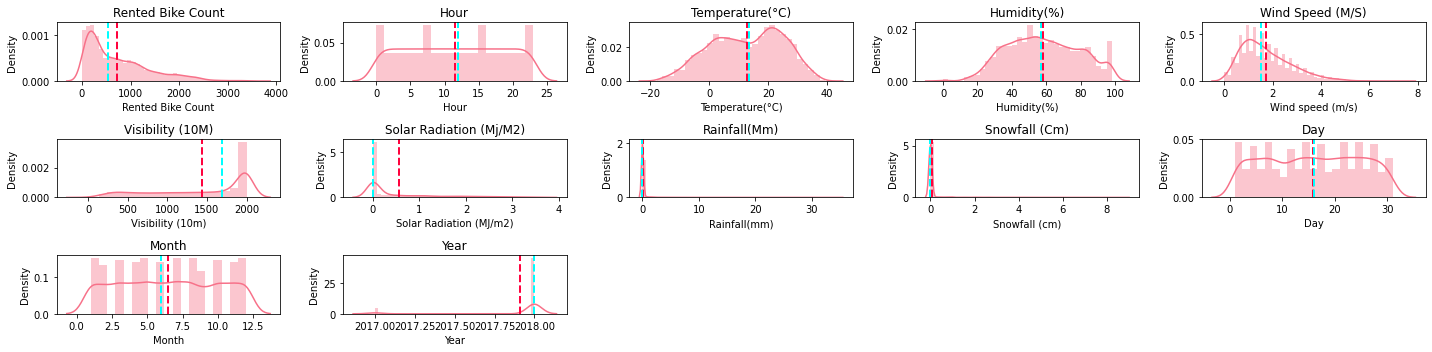

In [ ]:
#plot num data to analysis data distribution
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
  plt.subplot(3,5,index+1)
  sns.distplot(df1[column])
  feature = df1[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

In [ ]:
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(°C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Day,-0.019049,-1.198170


Discrete Variables Count: 4


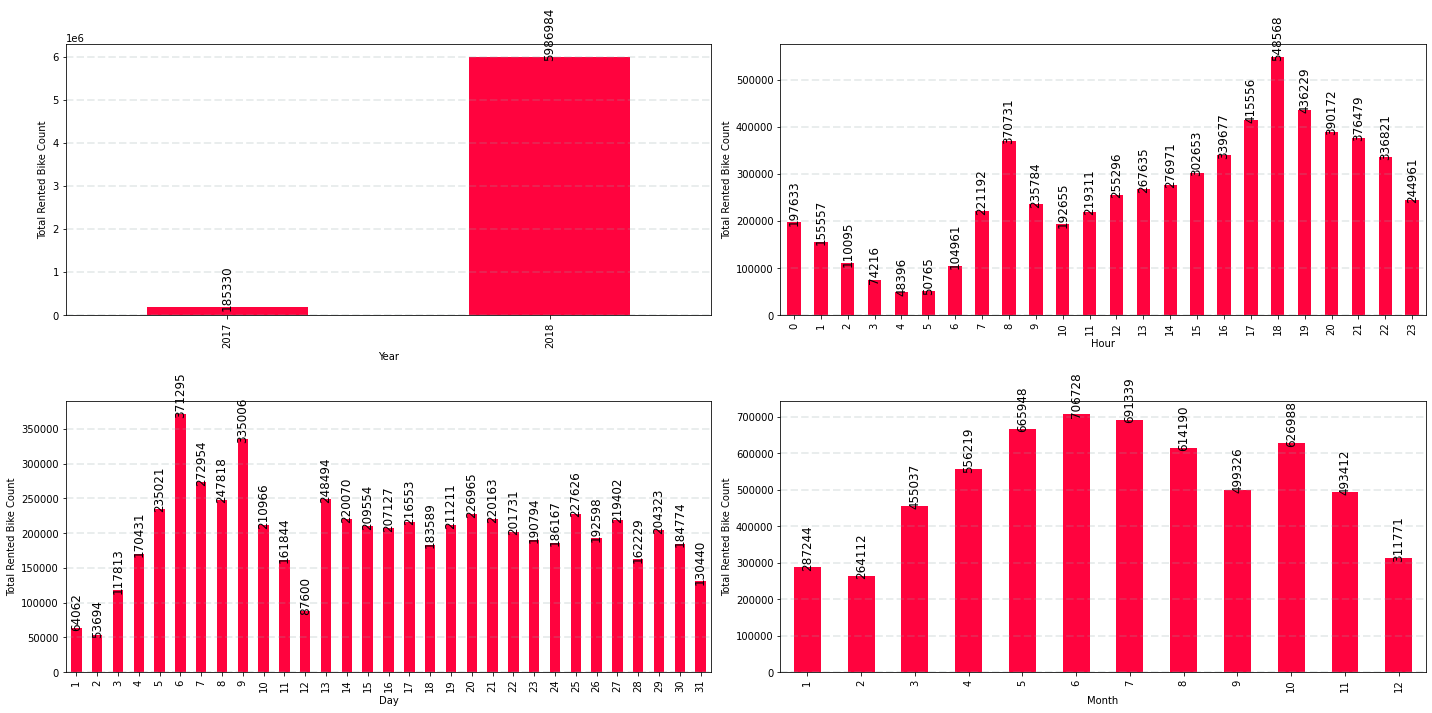

In [ ]:
## Lets analyse the discrete values by creating histograms to understand the distribution
num_discrete_value=[feature for feature in numerical_features if len(df1[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,2,index+1)
  dataset=df1.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = df1[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

#Categorical Variables

In [ ]:
#For categorical Data
categorical_features=[col for col in df1.columns if df1[col].dtype=='O']
categorical_features

['Seasons', 'Holiday']

In [ ]:
# Seprate dataframe for Categorical feature
cat_data=df1[categorical_features]

In [ ]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [ ]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [ ]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


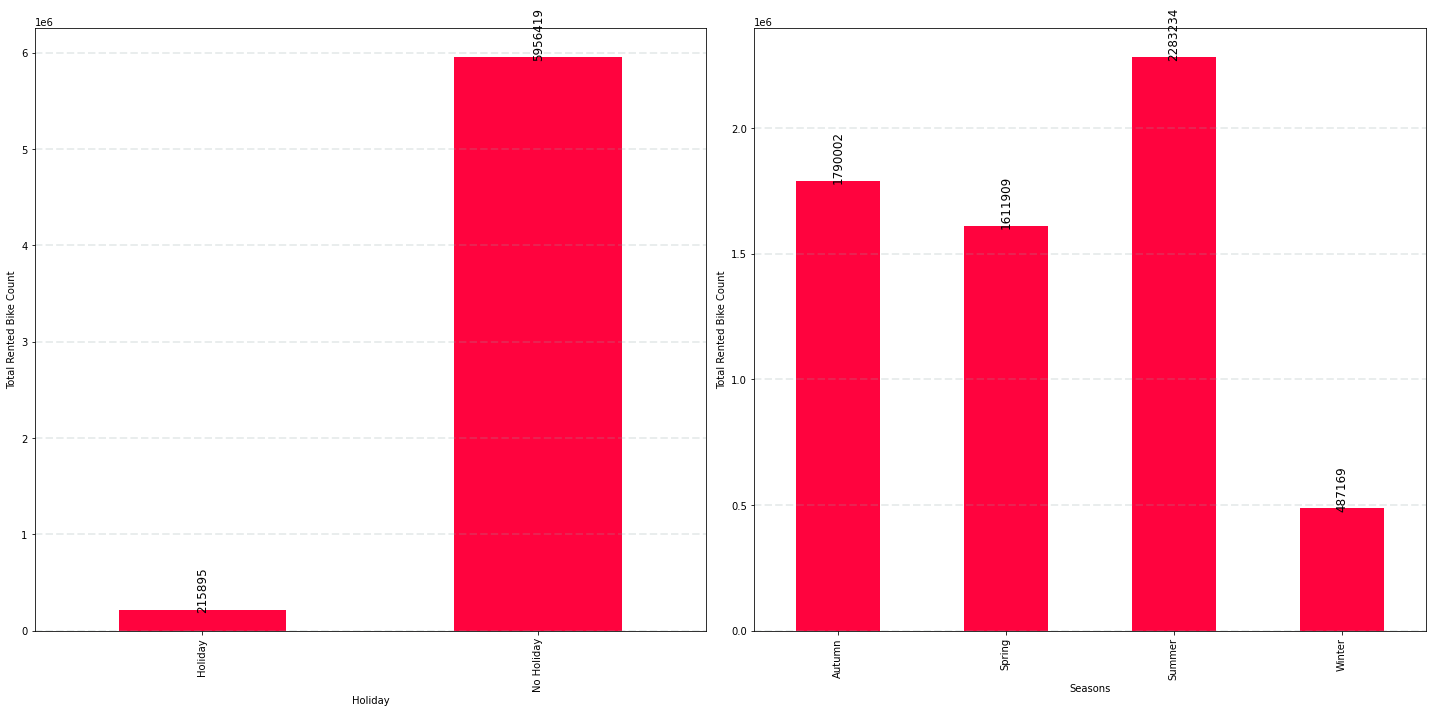

In [ ]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categorical_features) :
    plt.subplot(1,2,index+1)
    dataset=df1.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = df1[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

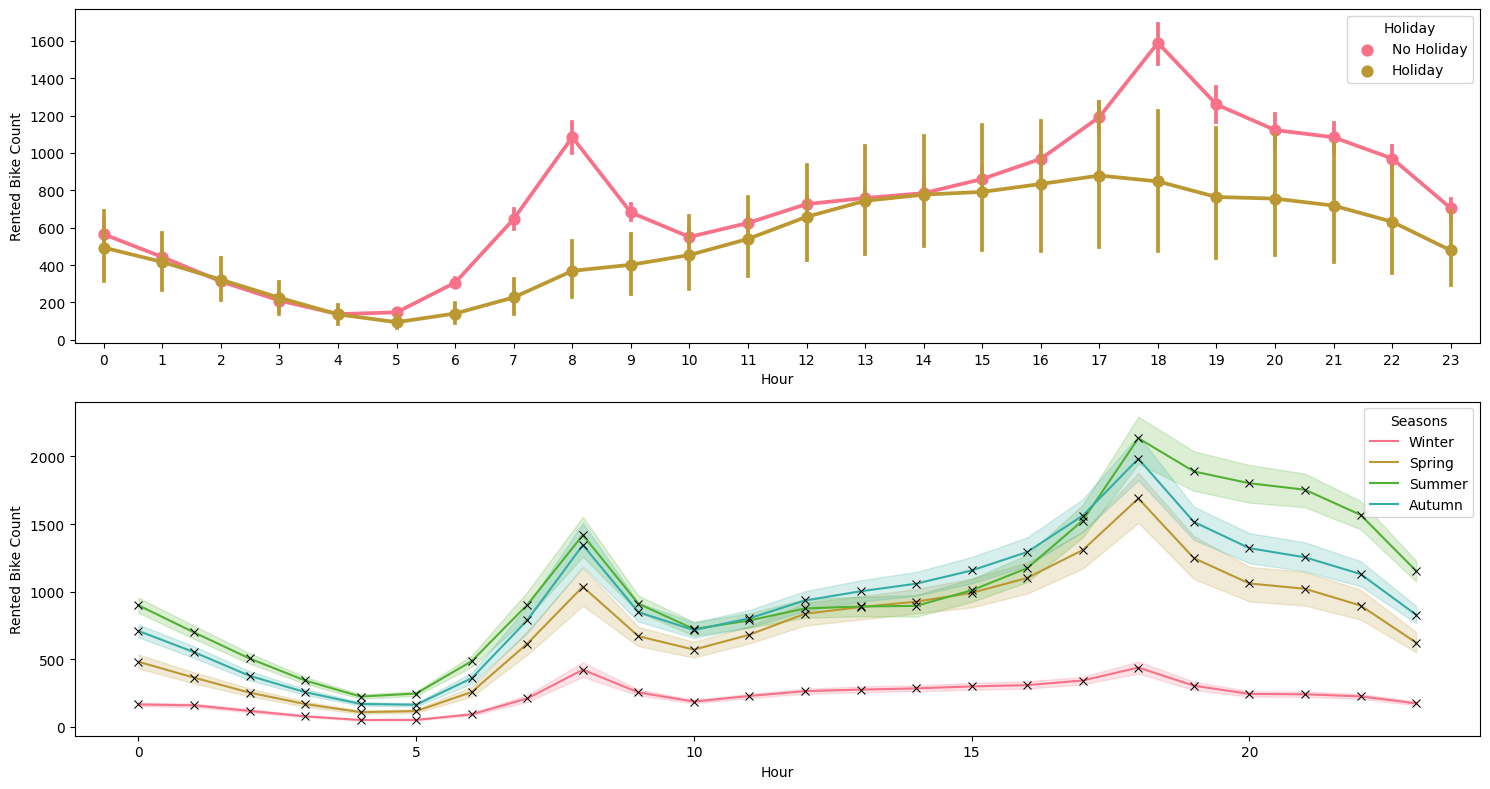

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

###Apply OneHotEncoder on Data
Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.



One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques like LabelEncoding

In [ ]:
# Encode labels of multiple columns at ones using LabelEncoder
le_df= df1.apply(LabelEncoder().fit_transform)
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,252,0,111,28,22,1779,0,0,0,3,1,11,0,0
1,202,1,108,29,8,1779,0,0,0,3,1,11,0,0
2,171,2,103,30,10,1779,0,0,0,3,1,11,0,0
3,105,3,101,31,9,1779,0,0,0,3,1,11,0,0
4,76,4,103,27,23,1779,0,0,0,3,1,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,990,19,205,25,26,1673,0,0,0,0,1,29,10,1
8756,754,20,197,28,23,1779,0,0,0,0,1,29,10,1
8757,685,21,189,30,3,1747,0,0,0,0,1,29,10,1
8758,703,22,184,32,10,1639,0,0,0,0,1,29,10,1


In [ ]:
#for checking raw data
df1.groupby("Seasons").count() 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
Autumn,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
Spring,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [ ]:
 #Seasons convert to numerical after apply transformation on data
le_df.groupby('Seasons').count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
0,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
1,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


####Checking Ditrubutation and Outliner on DataFrame

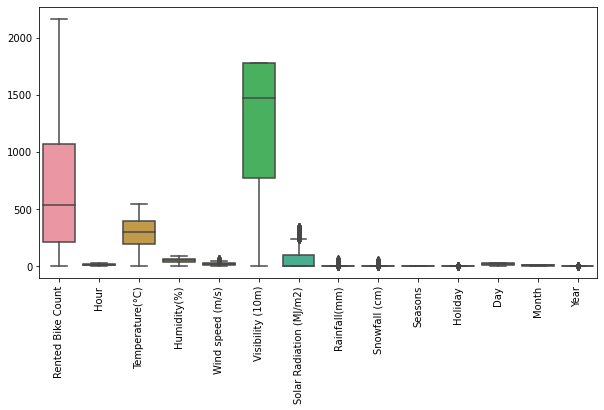

In [ ]:
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

Target Parameter Rented Bike Count distributation analysis

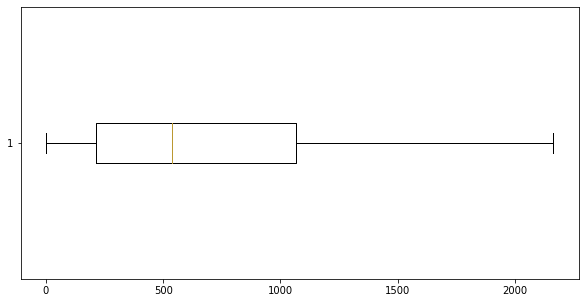

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df['Rented Bike Count'],vert=False)
plt.show()

###Outline detection using Interquartile Range

Square Root The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

Log Transformation The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

Cube root transformation involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

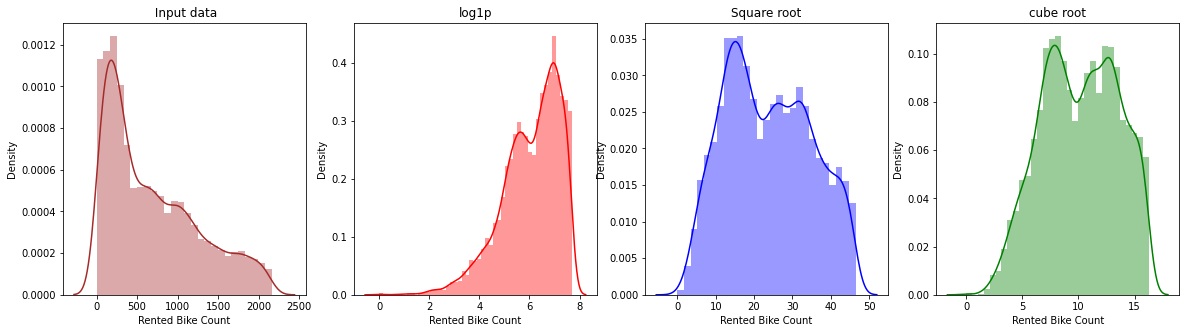

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((le_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(le_df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") 
sns.distplot(np.sqrt(le_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(le_df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [ ]:
import scipy.stats as stats

In [ ]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

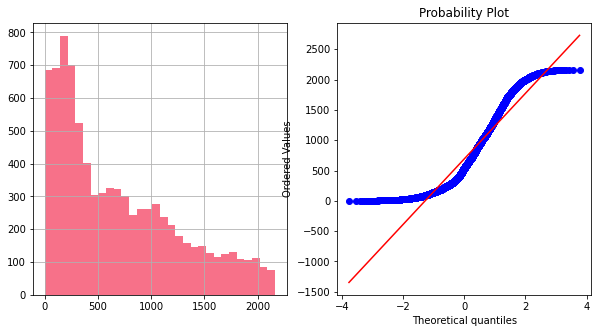

In [ ]:
plotvariable(le_df,'Rented Bike Count')

our Rented Bike Count target is not normally distributed ,so we need to make some transformations before supply to the model

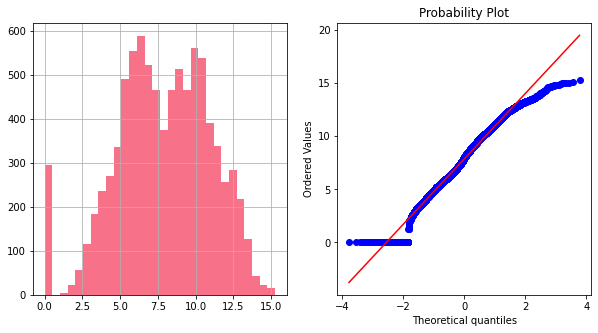

In [ ]:
data["RBC_qb"]=np.cbrt(data['Rented Bike Count']) #try cube root technique to convert positive screwd to normal distributation

plotvariable(data,"RBC_qb")

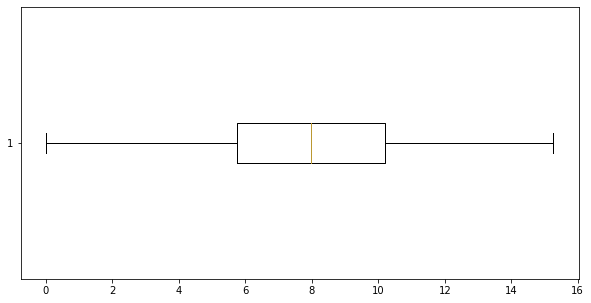

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

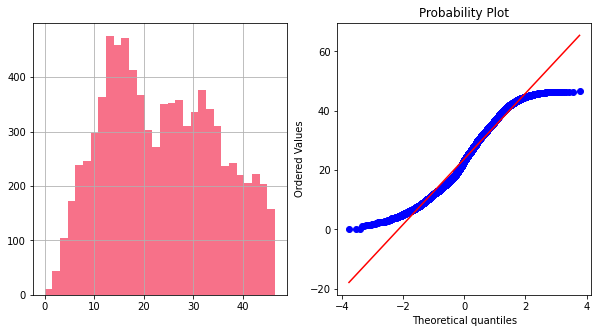

In [ ]:
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')


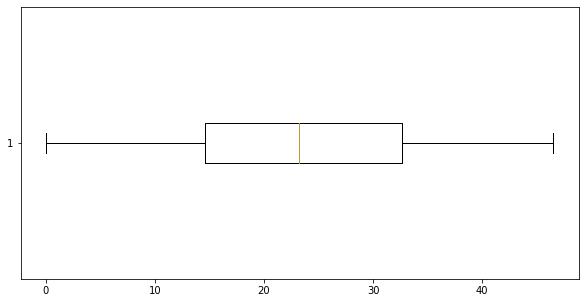

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df["Rented Bike Count"],vert=False)
plt.show()

Now, Its Look Like Normal Distributation

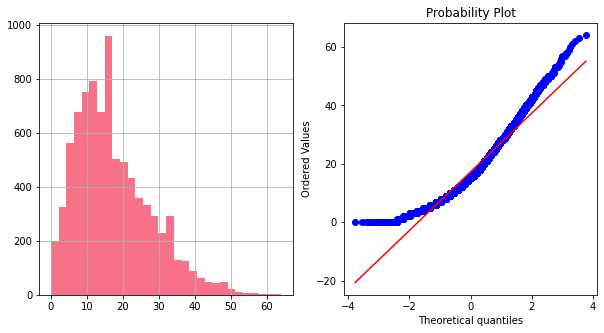

In [ ]:
plotvariable(le_df,'Wind speed (m/s)')

not look like normal and right screwed distributation so need to apply transformation

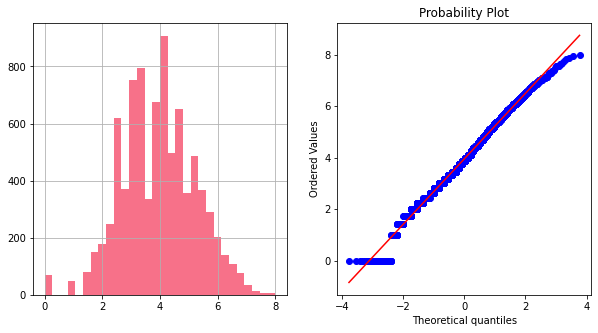

In [ ]:
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

###Identify Inputs and Targets
The column Rented Bike Count contains the value we need to predict i.e. it's the target column.
Data from all the other columns (except the first and the last column) can be used as inputs to the model.

Create a list X of column names containing data that can be used as input to train the model, and identify the target column as the variable y.

Make sure that the Date and Rented Bike Count columns are not included in X.

Now that we've identified the input and target columns, we can separate input & target data.

In [ ]:
# Identify the input columns (a list of column names)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

###Spliting Training and Testing Set
Finally, let's split the dataset into a training and testing set. We'll use a randomly select 30% subset of the data for validation. Also, we'll use just the numeric and encoded columns.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (6772, 13), X_test = (1693, 13)
The shape of the train and test set for the dependent variables are : y_train = (6772,), y_test = (1693,)


##Scaling Data and Model Building Using Various Regression Techniques
Regression searches for relationships among variables.

The dependent features are called the dependent variables, outputs, or responses.

The independent features are called the independent variables, inputs, regressors, or predictors.

In [ ]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

Adjusted R2 will always be less than or equal to R2.

MSE is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value.

RMSE is an abbreviation for Root Mean Square Error, which is the square root of the value obtained from the Mean Square Error function.

R^2 is 0.6484023843668458
 Adj R^2 is 0.645680068105243
 RMSE is: 6.782028398532071


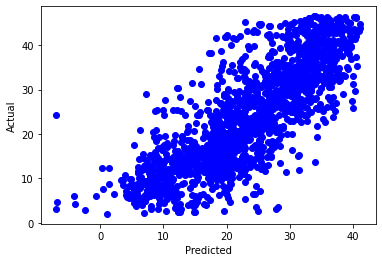

In [ ]:
predict(LinearRegression(),X,y)

R^2 is 0.7924575348327149
 Adj R^2 is 0.790850594959472
 RMSE is: 5.210628719163946


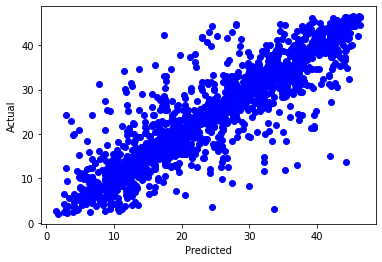

In [ ]:
predict(DecisionTreeRegressor(),X,y)

R^2 is 0.8989654848289432
 Adj R^2 is 0.898183204485153
 RMSE is: 3.6355617392560196


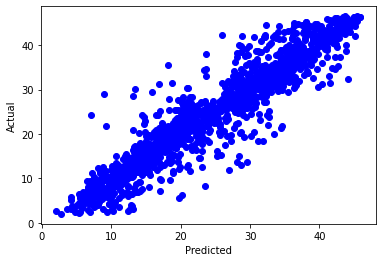

In [ ]:
predict(RandomForestRegressor(),X,y)

R^2 is 0.9092926042308541
 Adj R^2 is 0.9085902837156672
 RMSE is: 3.444752250753312


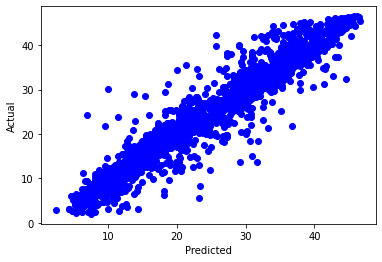

In [ ]:
predict(LGBMRegressor(),X,y)

####Models Accuracy Checking Using MinMaxScaler

In [ ]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

R^2 is 0.6484023843668462
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068


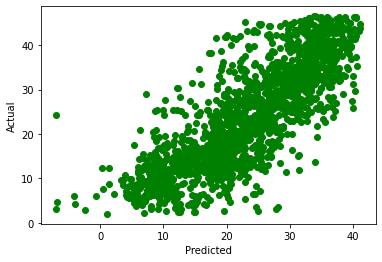

In [ ]:
predict_mm(LinearRegression(),X,y)

R^2 is 0.7943749023999161
 Adj R^2 is 0.7927828081361871
 RMSE is: 5.186503843575493


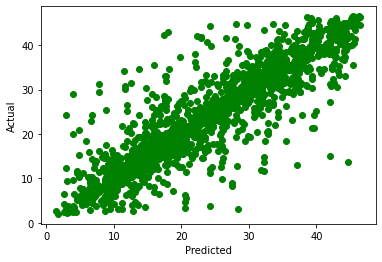

In [ ]:
predict_mm(DecisionTreeRegressor(),X,y)

R^2 is 0.9004297199069119
 Adj R^2 is 0.8996587767019029
 RMSE is: 3.609121542080319


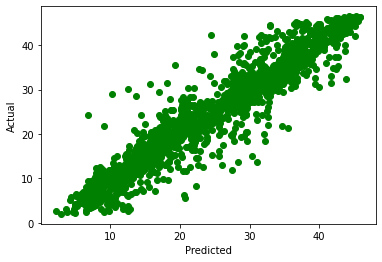

In [ ]:
predict_mm(RandomForestRegressor(),X,y)

R^2 is 0.9086899452289576
 Adj R^2 is 0.9079829585035117
 RMSE is: 3.4561767553073417


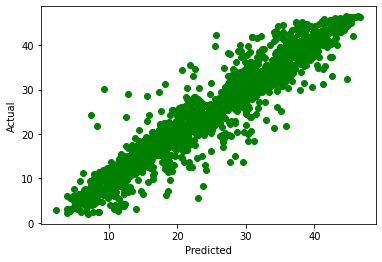

In [ ]:
predict_mm(LGBMRegressor(),X,y)

###Models Accuracy Checking Using Standard Scaler

In [ ]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])

Checking Actual value and Predicated value with it's differenace

R^2 is 0.6484023843668462 
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068
      Actual Value  Predicted Value  Difference
5028     33.749074        29.317478    4.431596
5121     11.224972         9.318051    1.906921
4191     33.955854        34.200968   -0.245115
8498     16.852300        19.913517   -3.061218
8072     41.713307        19.744203   21.969104
3300     33.075671        30.792839    2.282832
1461      7.615773         5.867516    1.748257
1324      4.472136         5.409999   -0.937863
8128     39.862263        36.828032    3.034231
16       21.931712        18.670651    3.261061


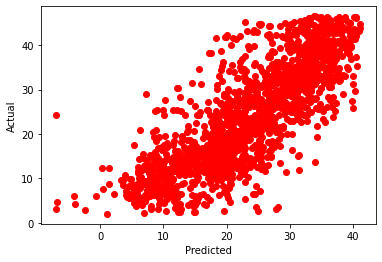

In [ ]:
predict_ss(LinearRegression(),X,y)

R^2 is 0.7981710243795539 
 Adj R^2 is 0.7966083223646249
 RMSE is: 5.138405825082691
      Actual Value  Predicted Value  Difference
5028     33.749074        31.240999    2.508075
5121     11.224972         5.000000    6.224972
4191     33.955854        35.411862   -1.456009
8498     16.852300        18.248288   -1.395988
8072     41.713307        22.934690   18.778617
3300     33.075671        29.274562    3.801108
1461      7.615773         8.366600   -0.750827
1324      4.472136         5.656854   -1.184718
8128     39.862263        34.423829    5.438434
16       21.931712        22.248595   -0.316883


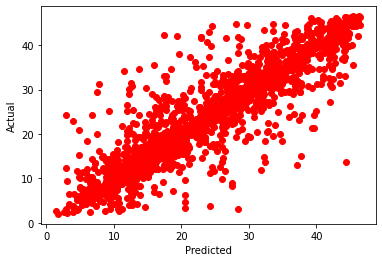

In [ ]:
predict_ss(DecisionTreeRegressor(),X,y)

R^2 is 0.9010319223237762 
 Adj R^2 is 0.9002656417938233
 RMSE is: 3.5981909817278113
      Actual Value  Predicted Value  Difference
5028     33.749074        32.182829    1.566245
5121     11.224972         7.373064    3.851908
4191     33.955854        36.016258   -2.060404
8498     16.852300        17.169185   -0.316885
8072     41.713307        33.937380    7.775927
3300     33.075671        31.815521    1.260150
1461      7.615773         8.442496   -0.826723
1324      4.472136         5.536488   -1.064352
8128     39.862263        36.624629    3.237634
16       21.931712        20.119711    1.812001


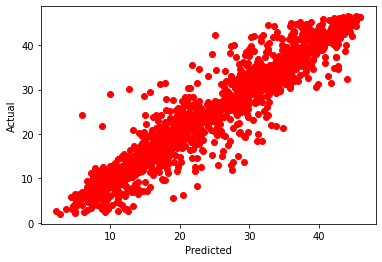

In [ ]:
predict_ss(RandomForestRegressor(),X,y)

R^2 is 0.9070138170111401 
 Adj R^2 is 0.9062938525210537
 RMSE is: 3.487754065892132
      Actual Value  Predicted Value  Difference
5028     33.749074        31.984073    1.765001
5121     11.224972         7.738305    3.486668
4191     33.955854        38.245208   -4.289355
8498     16.852300        16.871841   -0.019541
8072     41.713307        32.376403    9.336904
3300     33.075671        31.743416    1.332255
1461      7.615773         6.103525    1.512248
1324      4.472136         5.273349   -0.801213
8128     39.862263        37.596787    2.265476
16       21.931712        17.638108    4.293604


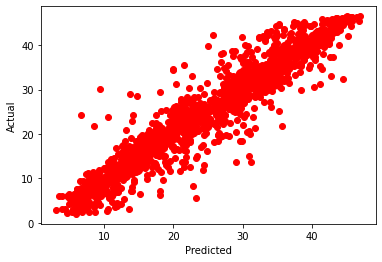

In [ ]:
predict_ss(LGBMRegressor(),X,y)

In [ ]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(  activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[10:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.007529258728027344,
  'Train_R2_Score': 0.6478907877040745,
  'Test_R2_Score': 0.6583635068923448,
  'Test_RMSE_Score': 6.4352389952296525},
 {'Name': 'Lasso: ',
  'Train_Time': 0.0033299922943115234,
  'Train_R2_Score': 0.6362247150339719,
  'Test_R2_Score': 0.6434832997542703,
  'Test_RMSE_Score': 6.573890897623658},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0021338462829589844,
  'Train_R2_Score': 0.6478907426327043,
  'Test_R2_Score': 0.6583560977217399,
  'Test_RMSE_Score': 6.435308776306985},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.012214183807373047,
  'Train_R2_Score': 0.7595401403043068,
  'Test_R2_Score': 0.634924859314125,
  'Test_RMSE_Score': 6.65232844723656},
 {'Name': 'SVR:',
  'Train_Time': 2.0387024879455566,
  'Train_R2_Score': 0.45718840668401606,
  'Test_R2_Score': 0.4651504542193533,
  'Test_RMSE_Score': 8.051899927587922},
 {'Name': 'DecisionTree ',
  'Train_Time': 0.04146456718444824,
  'Train_R2_Score':

###Compare Models Accuracy

In [ ]:
df_all_model=pd.DataFrame(model_data)
df_all_model

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.007529,0.647891,0.658364,6.435239
1,Lasso:,0.003330,0.636225,0.643483,6.573891
2,Ridge:,0.002134,0.647891,0.658356,6.435309
3,KNeighborsRegressor:,0.012214,0.759540,0.634925,6.652328
4,SVR:,2.038702,0.457188,0.465150,8.051900
5,DecisionTree,0.041465,1.000000,0.796217,4.970115
6,RandomForest,2.545602,0.985689,0.888823,3.671046
7,ExtraTreeRegressor :,1.349495,1.000000,0.895523,3.558714
8,GradientBoostingRegressor:,0.823952,0.888886,0.872145,3.936779
9,XGBRegressor:,0.279106,0.886665,0.870448,3.962830


As per above results Train and Test R2 Score is nearby in good model.

Near 1 Score is very good model.

##HyperParameter Tuning
Apply on GradientBoostingRegressor Model and improve Accuracy of Model.

Choose the best Hyperparameters

It’s a bit confusing to choose the best hyperparameters for boosting. But once you know how the boosting algorithms work, then you are able to choose it. Here are the best ones that I have chosen, learning_rate, max_depth, and the n_estimators. The max_depth and n_estimators are also the same parameters we chose in a random forest. Here we are taking an extra that is the learning_rate.

Call the Boosting regressor constructor and define the parameters. Here you will make the list of all possibilities for each of the Hyperparameters.

In [ ]:
gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[250,500,1000],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['ls','huber','quantile'],
}

In [ ]:
regressor = GridSearchCV(gbr, gbr_params, verbose=1,cv=3,n_jobs=-1) 
regressor.fit(X_train,y_train) 

#it's take around 26min _ take a tea break

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['ls', 'huber', 'quantile'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [250, 500, 1000]},
             verbose=1)

view selected best parameter by model

In [ ]:
regressor.best_params_        #view selected best parameter by model

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 6, 'n_estimators': 500}

In [ ]:
regressor.best_estimator_

GradientBoostingRegressor(loss='ls', max_depth=6, n_estimators=500)

In [ ]:
predictions = regressor.predict(X_test) 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )
 

Root Mean Squared Error is 3.4012 


Now apply best selected paramter and checking result

In [ ]:
X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'huber'}
# Create an instance of gradient boosting regressor

gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model

gbr.fit(X_train_std, y_train)

# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    regressor.predict(X_test)))) )

Model Accuracy: 0.905
The mean squared error (MSE) on test set: 11.4676
Root Mean Squared Error is 3.4012 


A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

# step-3: perform grid search
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor()
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
rfe = RFE(gbr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_   

{'n_features_to_select': 9}

In [ ]:
model_cv.best_estimator_     

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=9)

[10:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


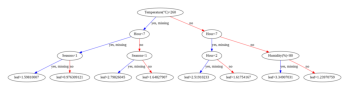

In [ ]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# plot single tree
plot_tree(model)
plt.show()

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.516975,0.199728,0.003412,0.000071,1,{'n_features_to_select': 1},0.361295,0.402071,0.365298,0.376353,...,0.372134,0.016431,13,0.404222,0.391979,0.401497,0.398413,0.401965,0.399615,0.004244
1,5.272435,0.075354,0.004054,0.000070,2,{'n_features_to_select': 2},0.666478,0.681030,0.646984,0.638830,...,0.653280,0.017893,12,0.669658,0.665498,0.673406,0.677222,0.676440,0.672445,0.004376
2,5.074074,0.066964,0.004186,0.000076,3,{'n_features_to_select': 3},0.837312,0.845714,0.825117,0.803386,...,0.824252,0.015989,11,0.837033,0.832370,0.838992,0.843732,0.841052,0.838636,0.003841
3,4.795107,0.069937,0.004466,0.000441,4,{'n_features_to_select': 4},0.854919,0.857159,0.860967,0.831228,...,0.847722,0.012389,10,0.861919,0.858851,0.859440,0.864616,0.865505,0.862066,0.002668
4,4.522407,0.067236,0.004381,0.000333,5,{'n_features_to_select': 5},0.871431,0.869545,0.873839,0.853814,...,0.865122,0.008118,9,0.877846,0.877062,0.875711,0.880692,0.879471,0.878156,0.001757
5,4.215719,0.072305,0.004182,0.000156,6,{'n_features_to_select': 6},0.870642,0.872346,0.874594,0.857338,...,0.866850,0.007093,8,0.880360,0.879136,0.878457,0.883879,0.882833,0.880933,0.002096
6,3.926084,0.166077,0.004393,0.000416,7,{'n_features_to_select': 7},0.873928,0.872944,0.876088,0.859884,...,0.868391,0.007338,7,0.883531,0.881322,0.880586,0.886822,0.883377,0.883127,0.002172
7,3.415493,0.056517,0.004328,0.000058,8,{'n_features_to_select': 8},0.876287,0.875303,0.880035,0.863000,...,0.871398,0.007292,6,0.885275,0.883327,0.883355,0.888750,0.887475,0.885636,0.002179
8,2.960638,0.055529,0.004213,0.000112,9,{'n_features_to_select': 9},0.880950,0.879244,0.883383,0.867376,...,0.875152,0.007558,1,0.887912,0.887049,0.885427,0.891514,0.890586,0.888498,0.002251
9,2.480209,0.052841,0.004160,0.000081,10,{'n_features_to_select': 10},0.878432,0.878110,0.881797,0.866039,...,0.873643,0.007257,3,0.887463,0.887191,0.885589,0.891069,0.891030,0.888468,0.002203


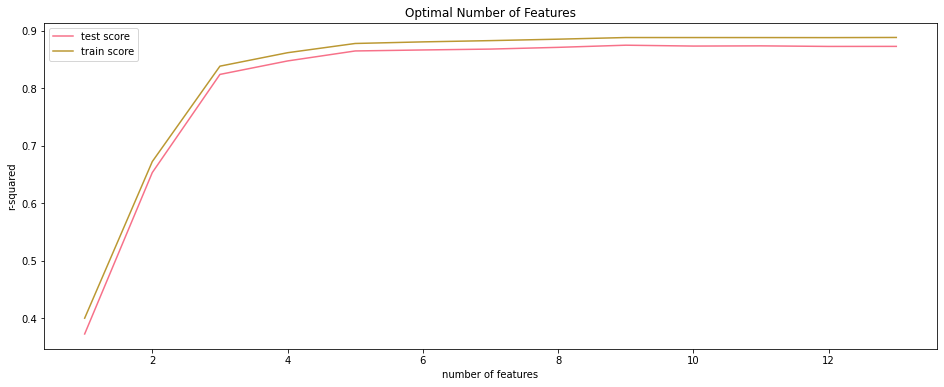

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')